# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # загрузим данные из датафрейма

In [3]:
# Изучим исходный датафрейм, выведем первые 20 строчек
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# Изучим исходный информацию датафрейма
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

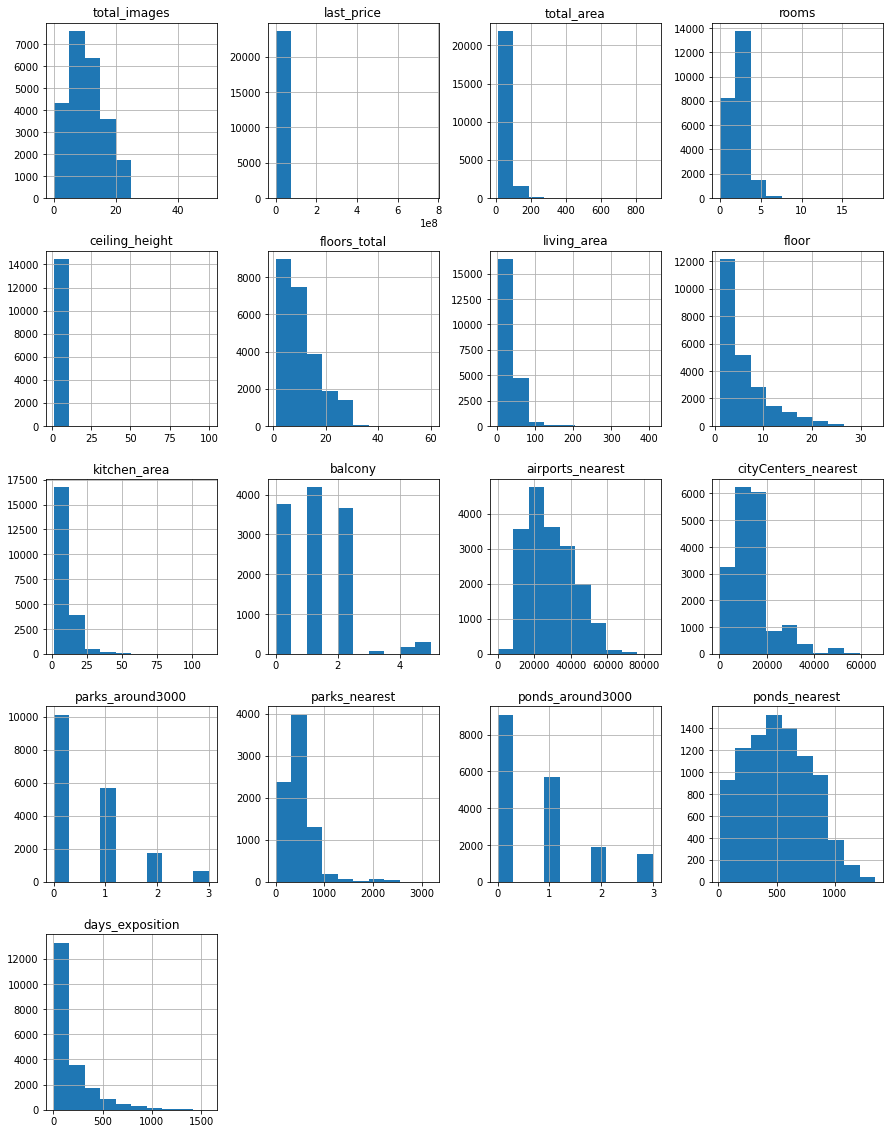

In [5]:
# Построим общую гистограмму для всех числовых столбцов таблицы
data.hist(figsize=(15, 20)); 

### Предобработка данных

#### Определение пропущенных значений

##### Определение в каких столбцах есть пропуски

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
# Пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пропущенные значения' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

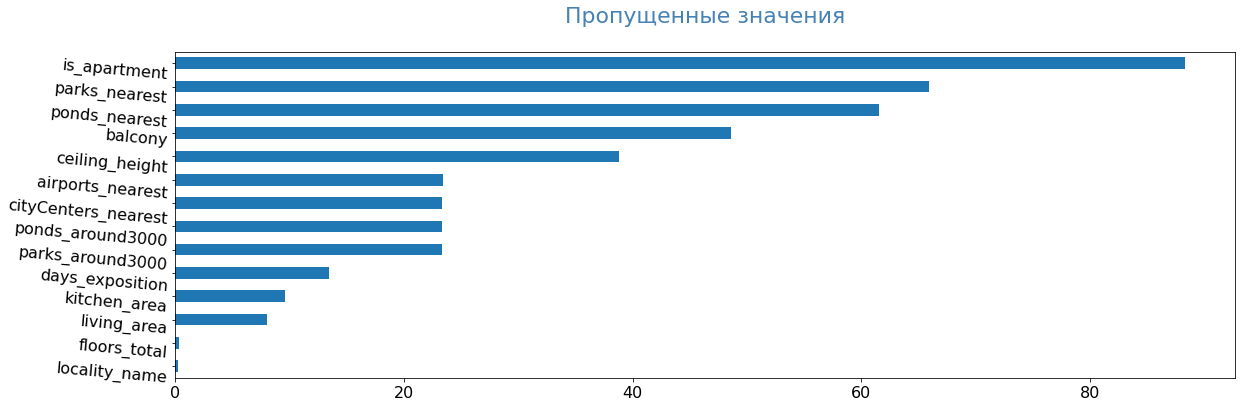

In [8]:
pass_value_barh(data)

##### Заполнение пропущенных значений

In [9]:
# Заполним пропущенные значения ceiling_height медианным значением
data['ceiling_height']=data.groupby(['locality_name', 'floors_total'])['ceiling_height'].apply(lambda x: x.fillna(x.median()))
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

In [10]:
# Заполним пропущенные значения living_area и kitchen_area 
living_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

In [11]:
# Заменяем пропущенные значения is_apartment на нет
data['is_apartment'] = data['is_apartment'].fillna(value=False)
# Заменяем пропущенные значения balcony на 0
data['balcony'] = data['balcony'].fillna(value=0)
# Заменяем пропущенные значения parks_around3000 на 0
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)
# Заменяем пропущенные значения ponds_around3000 на 0
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)

In [12]:
# Удаляем записи, где отсутствует локация и этажность
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True) 

#### Рассмотрение типов данных в каждом столбце

In [16]:
# Приводим в целочисленный тип стоимость квартиры
data['last_price'] = data['last_price'].astype(int)

In [17]:
# Приводим к типу даты дату публикации
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [18]:
# Приводим в целочисленный тип количество балконов
data['balcony'] = data['balcony'].astype(int)
# Приводим в целочисленный тип количество парков
data['parks_around3000'] = data['parks_around3000'].astype(int)
# Приводим в целочисленный тип количество прудов
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
# Приводим этажность к целочисленному типу
data['floors_total'] = data['floors_total'].astype(int)

#### Устранение неявных дубликатов в названиях населенных пунктов

In [19]:
data['locality_name']=data['locality_name'].str.replace('ё', 'е') # поменяли ё на е
data['locality_name']=data['locality_name'].str.replace('городской поселок', 'поселок городского типа') # поменяли городской поселок на поселок городского типа
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары',
       'поселок городского типа Янино-1', 'поселок Парголово',
       'поселок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посел

In [20]:
# Количество уникальных значений в столбце locality_name
data.locality_name.nunique()

323

#### Устранение редких и выбивающихся значений

In [21]:
# Устраним редкие и выбивающиеся аномалии столбца ceiling_height
data.drop(index=data.query('ceiling_height < 2.5').index,inplace=True) # удаляем квартиры с высотой потолков от 36м
data.drop(index=data.query('ceiling_height > 4 and ceiling_height < 25').index,inplace=True) # удаляем квартиры с высотой потолков от 4 до 25м
data.update(data[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 36)]['ceiling_height']/10) # для квартир с высотой потолков до 25 до 36 метров предполагаем, что это опечатка и делим на 10, получая 2.5 и 3.6м
data.drop(index=data.query('ceiling_height > 36').index,inplace=True) # удаляем квартиры с высотой потолков от 36м

In [22]:
# Устраним редкие и выбивающиеся аномалии столбца living_area
data.drop(index=data.query('living_area < 10').index,inplace=True) # отбросим значения с жилой площадью меньше 10кв.м.

 Устранение редких и выбивающихся аномалий столбца kithcen_area:

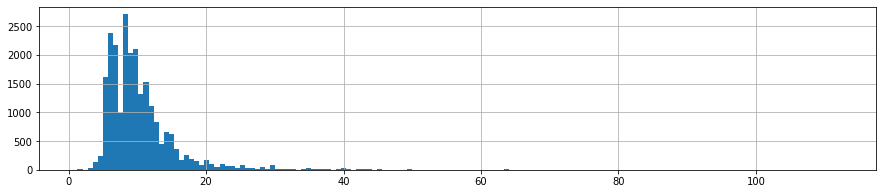

In [23]:
# График по столбцу kitchen_area
data.kitchen_area.hist(bins = 150, figsize = (15,3));

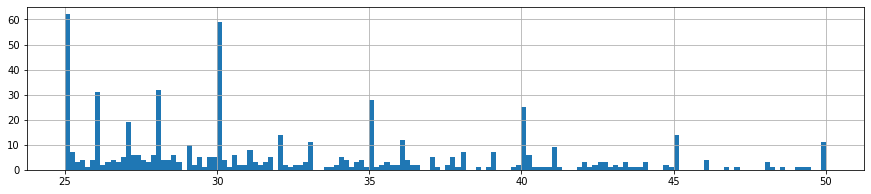

In [24]:
# График по столбцу kitchen_area
data.kitchen_area.hist(bins = 150, figsize = (15,3), range = (25,50));

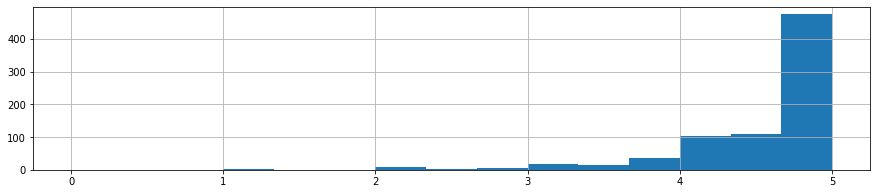

In [25]:
# График по столбцу kitchen_area
data.kitchen_area.hist(bins = 15, figsize = (15,3), range = (0,5));

In [26]:
# Устраним редкие и выбивающиеся аномалии столбца kitchen_area
data.drop(index=data.query('kitchen_area > 30').index,inplace=True) # отбросим значения с площадью кухни больше 30кв.м.
data.drop(index=data.query('kitchen_area < 4').index,inplace=True) # отбросим значения с площадью кухни меньше 4кв.м.
## Почему-то одним кодом data.drop(index=data.query('kitchen_area < 4 and kitchen_area > 30').index,inplace=True) не обновляет значения

 Устранение редких и выбивающихся аномалий столбца total_area:

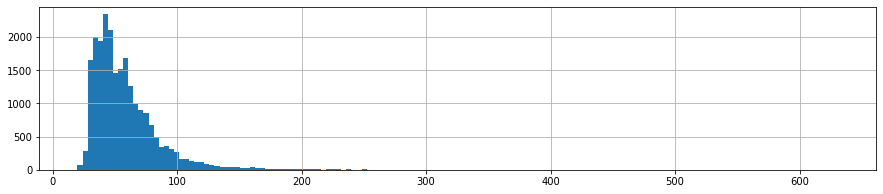

In [27]:
# График по столбцу total_area
data.total_area.hist(bins = 150, figsize = (15,3));

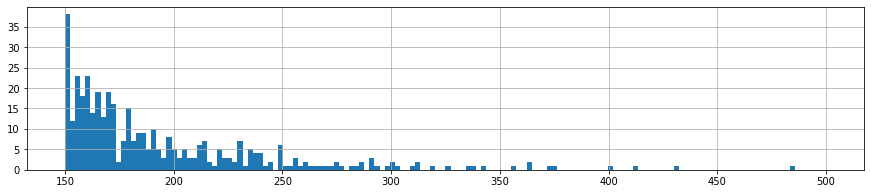

In [28]:
# График по столбцу total_area
data.total_area.hist(bins = 150, figsize = (15,3), range = (150,500));

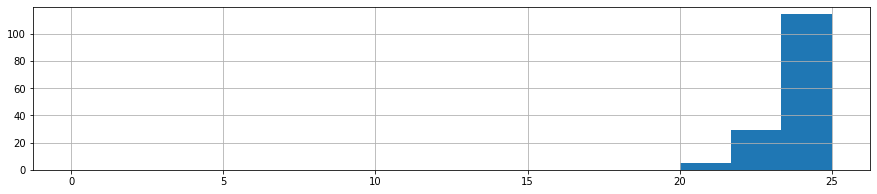

In [29]:
# График по столбцу total_area
data.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [30]:
# Устраним редкие и выбивающиеся аномалии столбца total_area
data.drop(index=data.query('total_area > 200').index,inplace=True) # отбросим значения с общей площадью больше 200кв.м.
data.drop(index=data.query('total_area < 23').index,inplace=True) # отбросим значения с общей площадью меньше 23кв.м.

In [31]:
# Устраним редкие и выбивающиеся аномалии столбца rooms
data.drop(index=data.query('rooms > 7').index,inplace=True) # отбросим значения с общим числом комнат больше 7

In [32]:
# Устраним редкие и выбивающиеся аномалии столбца floors_total
data.drop(index=data.query('floors_total > 30').index,inplace=True) # отбросим значения с общим числом этажей больше 30

 Устранение редких и выбивающихся аномалий столбца days_exposition:

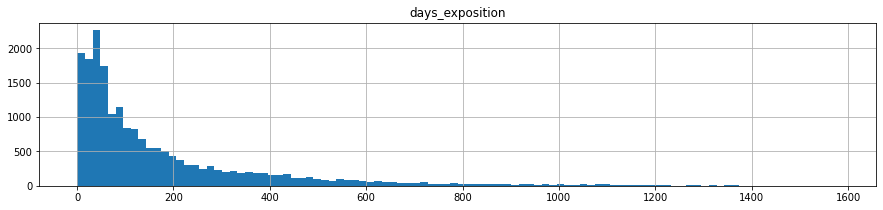

In [33]:
# График по столбцу days_exposition
data.hist(column = 'days_exposition', bins = 100, figsize = (15,3));

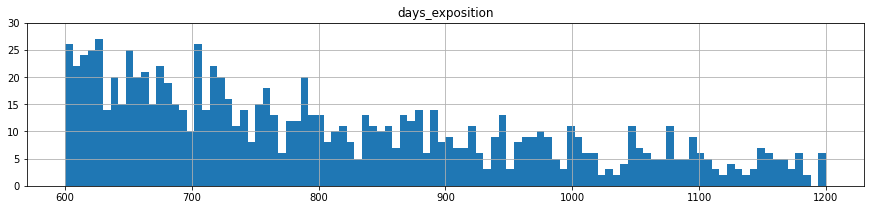

In [34]:
# График по столбцу days_exposition
data.hist(column = 'days_exposition', bins = 100, figsize = (15,3), range=(600, 1200))
plt.ylim(0, 30);


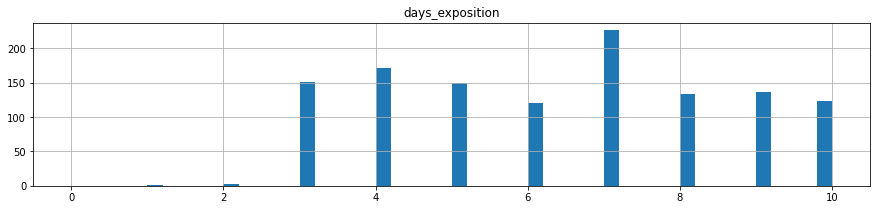

In [35]:
# График по столбцу days_exposition
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range=(0, 10));

In [36]:
# Устраним редкие и выбивающиеся аномалии столбца days_exposition
data.drop(index=data.query('days_exposition > 800').index,inplace=True) # отбросим значения с общим числом дней после опубликования объявления больше 800 (2 года)
data.drop(index=data.query('days_exposition < 2').index,inplace=True) # отбросим значения с общим числом дней после опубликования объявления меньше 2

In [37]:
# Устраним редкие и выбивающиеся аномалии столбца last_price
data.drop(index=data.query('last_price > 200000000').index,inplace=True) # отбросим значения с общим стоимлстью квартиры более 200млн.

In [38]:
# Проверим пропущенные значения
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5303
cityCenters_nearest      5283
parks_around3000            0
parks_nearest           14822
ponds_around3000            0
ponds_nearest           13906
days_exposition          3007
dtype: int64

In [39]:
# Проверим какие аномалии остались
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,235.00","22,235.00","22,235.00","19,228.00","22,235.00","22,235.00","22,235.00","22,235.00","22,235.00"
min,0.00,23.00,2.50,2.00,"430,000.00",10.00,4.00,1.00,1.00
max,7.00,200.00,4.00,800.00,"124,000,000.00",164.70,30.00,27.00,29.00
median,2.00,51.00,2.65,90.00,"4,581,000.00",30.00,9.00,4.00,9.00


### Посчитайте и добавьте в таблицу новые столбцы

#### Цена одного квадратного метра

In [50]:
data['sm_price'] = data['last_price'] / data['total_area']

#### День недели публикации объявления

In [51]:
data['weekday'] = data['first_day_exposition'].dt.weekday

#### Месяц публикации объявления

In [52]:
data['month'] = data['first_day_exposition'].dt.month

#### Год публикации объявления

In [53]:
data['year'] = data['first_day_exposition'].dt.year

#### Тип этажа квартиры

In [54]:
# Добавляем столбец тип этажа квартиры floor_type
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1) 

In [55]:
data['floor_type'].head(10)

0     другой
1     первый
2     другой
3     другой
5     другой
6     другой
7     другой
8     другой
9     другой
10    другой
Name: floor_type, dtype: object

#### Расстояние до центра в километрах

In [56]:
# Добавляем столбец расстояние в км до центра города cityCenters_nearest_km
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(value=0).astype(int)

### Проведите исследовательский анализ данных

#### Изучаем параметры объектов

In [57]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sm_price,weekday,month,year,cityCenters_nearest_km
count,22235.000000,2.223500e+04,22235.000000,22235.000000,22235.000000,22235.000000,22235.000000,22235.000000,22235.000000,22235.000000,...,22235.000000,7413.000000,22235.000000,8329.000000,19228.000000,22235.000000,22235.000000,22235.000000,22235.000000,22235.000000
mean,9.862154,5.788042e+06,57.283053,2.021588,2.696501,10.706094,32.972211,5.878750,9.926647,0.597841,...,0.453474,490.263591,0.569058,525.561172,154.866705,97157.718264,2.572566,6.402968,2017.429008,10.608635
std,5.652466,4.976439e+06,25.077353,0.981928,0.212024,6.540896,16.805442,4.849721,4.094229,0.960821,...,0.733691,336.612516,0.866420,276.586225,164.272888,40950.168860,1.790524,3.488718,0.981631,9.538139
min,0.000000,4.300000e+05,23.000000,0.000000,2.500000,1.000000,10.000000,1.000000,4.000000,0.000000,...,0.000000,1.000000,0.000000,13.000000,2.000000,7962.962963,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,19.000000,2.000000,7.000000,0.000000,...,0.000000,288.000000,0.000000,303.000000,44.000000,76151.686310,1.000000,3.000000,2017.000000,2.000000
50%,9.000000,4.581000e+06,51.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,0.000000,456.000000,0.000000,511.000000,90.000000,94444.444444,3.000000,6.000000,2017.000000,11.000000
75%,14.000000,6.500000e+06,67.700000,3.000000,2.750000,16.000000,41.600000,8.000000,11.500000,1.000000,...,1.000000,613.000000,1.000000,734.000000,210.000000,113000.000000,4.000000,10.000000,2018.000000,15.000000
max,50.000000,1.240000e+08,200.000000,7.000000,4.000000,29.000000,164.700000,27.000000,30.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,800.000000,995983.935743,6.000000,12.000000,2019.000000,65.000000


##### Общая площадь

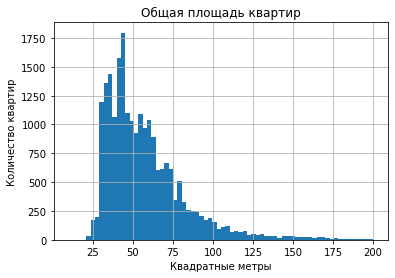

3440     200.0
8355     200.0
6509     198.9
16656    198.1
11438    198.0
10315    198.0
18391    197.9
18790    197.2
12922    197.0
3365     197.0
Name: total_area, dtype: float64

In [58]:
data.hist('total_area', bins=70, range=(10, 200))
plt.title('Общая площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
data['total_area'].sort_values(ascending=False).head(10) # наибольшие по общей площади варианты

Вывод: Большинство квартир менее 100кв.м. Больше всего квартир около 50кв.м

##### Жилая площадь

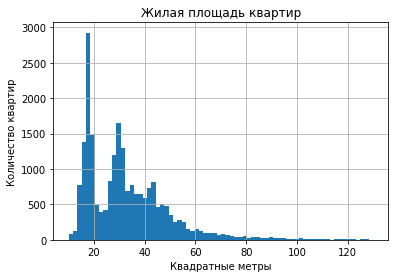

21676    164.7
22904    159.6
9392     150.8
11800    147.2
11438    147.0
18790    145.4
22420    145.0
4710     142.0
12567    140.0
13729    140.0
Name: living_area, dtype: float64

In [59]:
data.hist('living_area', bins=70, range=(10, 130))
plt.title('Жилая площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
data['living_area'].sort_values(ascending=False).head(10) # наибольшие по жилой площади варианты

Вывод: Наблюдаем два пика - на 18кв.м. и на 30кв.м. Есть явный провал около 24кв.м.

##### Площадь кухни

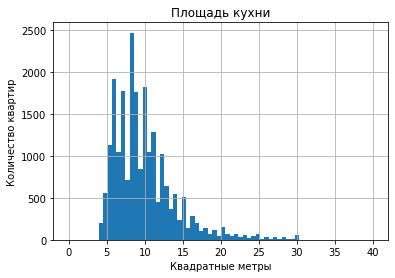

279      30.0
2520     30.0
15755    30.0
15616    30.0
4172     30.0
19723    30.0
4079     30.0
11176    30.0
15104    30.0
8799     30.0
Name: kitchen_area, dtype: float64

In [60]:
data.hist('kitchen_area', bins=70, range=(0, 40))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
data['kitchen_area'].sort_values(ascending=False).head(10) # наибольшие по площади кухни варианты

Вывод: Большинство квартир имеют площадь кухни от 8 до 11кв.м.

##### Цена объекта

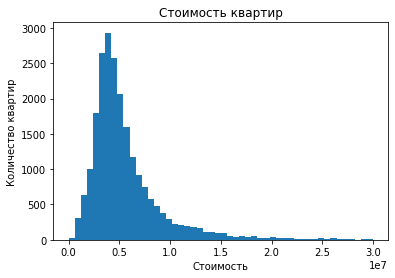

4996     124000000
16590     98000000
11329     95000000
12045     86738800
11430     85000000
10362     83820000
6462      82000000
6813      79000000
5232      77612080
15726     77349000
Name: last_price, dtype: int64

In [61]:
plt.hist(data['last_price'], bins=50, range=(0,30000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
data['last_price'].sort_values(ascending=False).head(10) # наибольшие по стоимости квартир варианты

Вывод: Большинство квартир имеют стоимость в пределах 3.5-4млн. руб.

##### Количество комнат

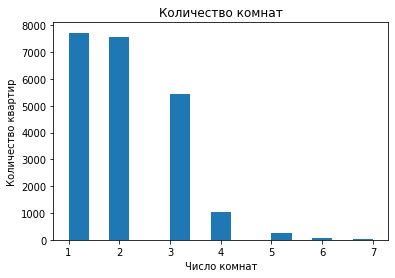

3365     7
2039     7
1943     7
855      7
23555    7
2261     7
21689    7
3545     7
15196    7
4159     7
Name: rooms, dtype: int64

In [62]:
plt.hist(data['rooms'], bins=15, range=(1,7))
plt.title('Количество комнат')
plt.xlabel('Число комнат')
plt.ylabel('Количество квартир')
plt.show()
data['rooms'].sort_values(ascending=False).head(10) # наибольшие по числу комнат варианты

Вывод: В основном квартиры состоят и 1, 2 и 3-х комнат.

##### Высота полотков

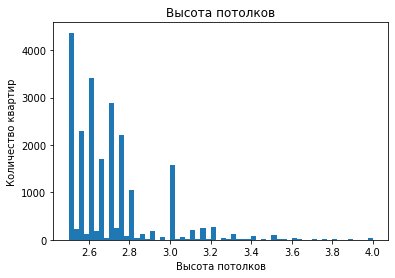

12865    4.0
13463    4.0
19607    4.0
3773     4.0
7696     4.0
6269     4.0
10845    4.0
15168    4.0
15528    4.0
5694     4.0
Name: ceiling_height, dtype: float64

In [63]:
plt.hist(data['ceiling_height'], bins=60)
plt.title('Высота потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
plt.show()
data['ceiling_height'].sort_values(ascending=False).head(10) # наибольшие по высоте потолка варианты

Вывод: Большинство квартир имеют высоту потолков от 2.5 до 2.7м.

##### Этаж квартиры

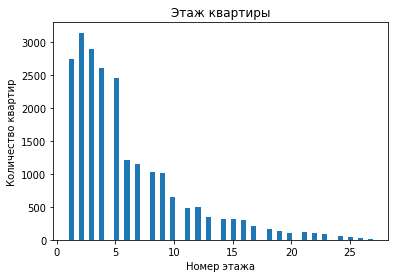

23292    27
7711     27
4091     27
16644    27
2629     27
13276    27
6157     27
113      27
4724     26
4247     26
Name: floor, dtype: int64

In [64]:
plt.hist(data['floor'], bins=60)
plt.title('Этаж квартиры')
plt.xlabel('Номер этажа')
plt.ylabel('Количество квартир')
plt.show()
data['floor'].sort_values(ascending=False).head(10) # наибольшие по этажу варианты

Вывод: Большинство квартир расположены в 1-5 этажных строениях.

##### Тип этажа квартиры

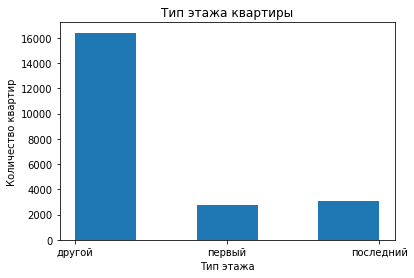

In [65]:
plt.hist(data['floor_type'], bins=5)
plt.title('Тип этажа квартиры')
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')
plt.show()

Вывод: Большинство квартир расположены не на первом и не на последнем этажах.

##### Общее количество этажей в доме

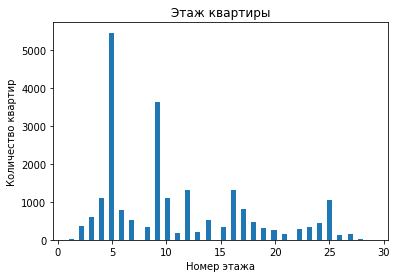

3797     29
20876    28
23017    28
8622     28
14033    28
14018    28
7073     28
324      28
806      28
14186    28
Name: floors_total, dtype: int64

In [66]:
plt.hist(data['floors_total'], bins=60)
plt.title('Этаж квартиры')
plt.xlabel('Номер этажа')
plt.ylabel('Количество квартир')
plt.show()
data['floors_total'].sort_values(ascending=False).head(10) # наибольшие по количеству этажей варианты

Вывод: Наблюдаем явные пики, это 5-ти и 9-ти этажные застройки.

##### Расстояние до центра города 

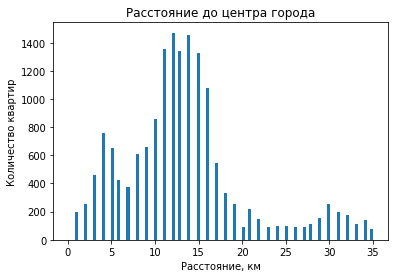

5340     65
577      65
5218     64
2974     62
18884    62
16569    61
23123    60
4441     59
11244    59
939      56
Name: cityCenters_nearest_km, dtype: int64

In [67]:
plt.hist(data['cityCenters_nearest_km'], bins=100, range=(0.1,35))
plt.title('Расстояние до центра города')
plt.xlabel('Расстояние, км')
plt.ylabel('Количество квартир')
plt.show()
data['cityCenters_nearest_km'].sort_values(ascending=False).head(10) # наибольшие по расстоянию до центра

Вывод: В основном квартиры расположены в 12-16км от центра.

##### Расстояние до ближайшего аэропорта 

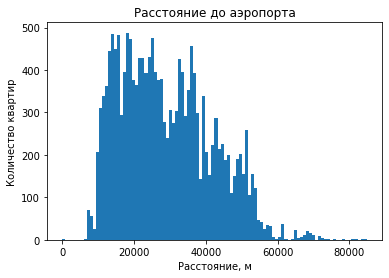

5340     84853.0
577      84665.0
5218     83758.0
18884    81607.0
2974     81355.0
4441     78527.0
939      75646.0
376      73827.0
6247     73547.0
22941    73391.0
Name: airports_nearest, dtype: float64

In [68]:
plt.hist(data['airports_nearest'], bins=100)
plt.title('Расстояние до аэропорта')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество квартир')
plt.show()
data['airports_nearest'].sort_values(ascending=False).head(10) # наибольшие по расстоянию до аэропорта

Вывод: В основном квартиры расположены в 20000-25000м от аэропорта.

##### Расстояние до ближайшего парка 

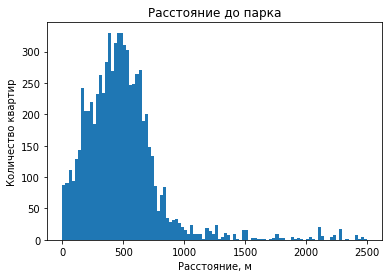

10959    3190.0
19430    3190.0
1590     3064.0
19208    3013.0
23080    2984.0
2659     2905.0
1860     2888.0
7855     2880.0
3865     2847.0
22003    2768.0
Name: parks_nearest, dtype: float64

In [69]:
plt.hist(data['parks_nearest'], bins=100,range =(0, 2500))
plt.title('Расстояние до парка')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество квартир')
plt.show()
data['parks_nearest'].sort_values(ascending=False).head(10) # наибольшие по расстоянию до парка

Вывод: В основном квартиры расположены в районе 500м от ближайшего парка.

#####  День публикации объявления

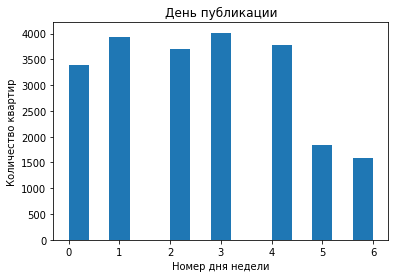

In [70]:
plt.hist(data['weekday'], bins=15)
plt.title('День публикации')
plt.xlabel('Номер дня недели')
plt.ylabel('Количество квартир')
plt.show()

Вывод: В основном объявления публикуют в будние дни.

##### Месяц публикации объявления

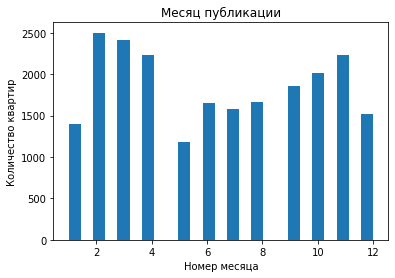

In [71]:
plt.hist(data['month'], bins=25)
plt.title('Месяц публикации')
plt.xlabel('Номер месяца')
plt.ylabel('Количество квартир')
plt.show()

Вывод: С февраля по апрель наблюдается повышенная активность. В мае заметен провал.

#### Изучаем как быстро продавались квартиры

##### Построим гистограмму

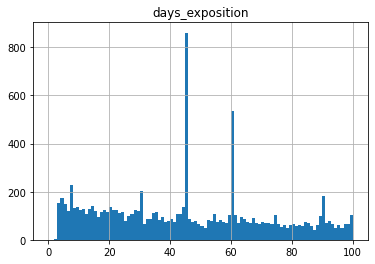

In [72]:
data.hist('days_exposition', bins=100, range = (0,100));

##### Подсчет среднего и медианы

In [73]:
# Выведем список характерных значений days_exposition
data['days_exposition'].describe()

count    19228.000000
mean       154.866705
std        164.272888
min          2.000000
25%         44.000000
50%         90.000000
75%        210.000000
max        800.000000
Name: days_exposition, dtype: float64

Вывод: Медианное время продажи - 90 дней. Среднее время продажи - 154 дня.
В основном квартиры продаются за срок в 100 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев.
Быстрой продажей можно назвать срок в 45 дней и меньше. Долгой продажей - 200 дней (7 месяцев) и дольше.

#### Изучение факторов наиболее влияющих на общую стоимость объекта

##### Зависимость цены от общей площади

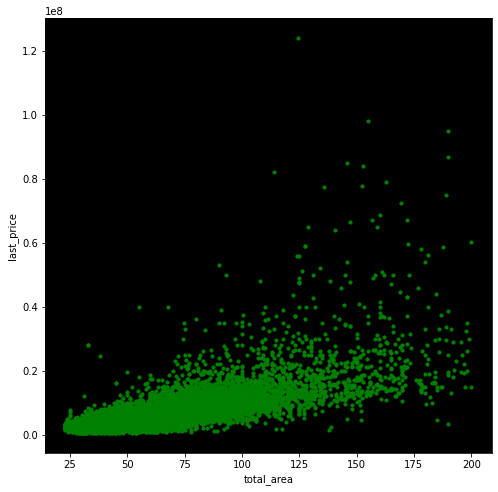

In [74]:
x = data['total_area']    #  x - координаты точек
y = data['last_price']    #  y - координаты точек

fig, ax = plt.subplots()

ax.scatter(x, y,
           c = 'green', s=10)    #  цвет точек

ax.set_facecolor('black')     #  цвет области Axes
     

fig.set_figwidth(8)     #  ширина и
fig.set_figheight(8)    #  высота "Figure"

ax.set_xlabel('total_area')
ax.set_ylabel('last_price')
plt.show()

##### Зависимость цены от жилой площади

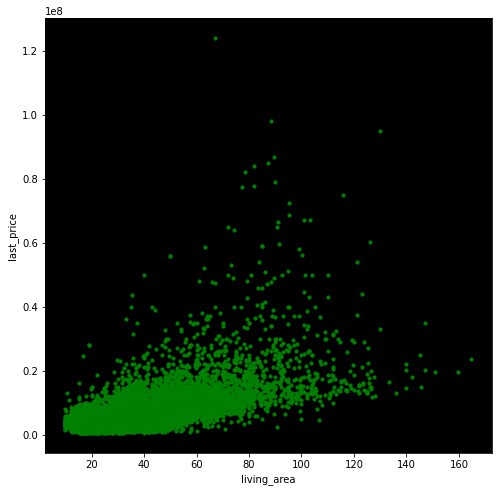

In [75]:
x = data['living_area']    #  x - координаты точек
y = data['last_price']    #  y - координаты точек

fig, ax = plt.subplots()

ax.scatter(x, y,
           c = 'green', s=10)    #  цвет точек

ax.set_facecolor('black')     #  цвет области Axes
     

fig.set_figwidth(8)     #  ширина и
fig.set_figheight(8)    #  высота "Figure"

ax.set_xlabel('living_area')
ax.set_ylabel('last_price')
plt.show()

##### Зависимость цены от площади кухни

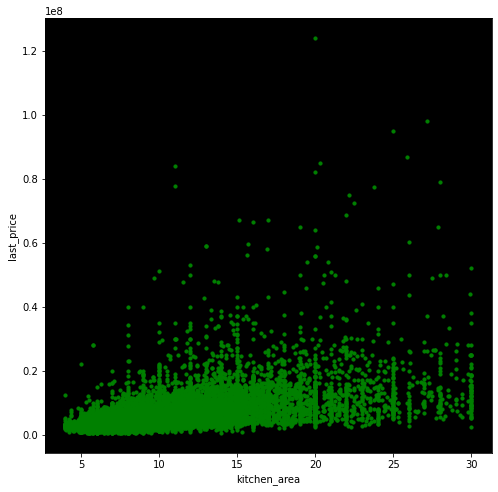

In [76]:
x = data['kitchen_area']    #  x - координаты точек
y = data['last_price']    #  y - координаты точек

fig, ax = plt.subplots()

ax.scatter(x, y,
           c = 'green', s=10)    #  цвет точек

ax.set_facecolor('black')     #  цвет области Axes
     

fig.set_figwidth(8)     #  ширина и
fig.set_figheight(8)    #  высота "Figure"

ax.set_xlabel('kitchen_area')
ax.set_ylabel('last_price')
plt.show()

Вывод: Чем больше площадь, тем выше стоимость. 

##### Зависимость цены от числа комнат

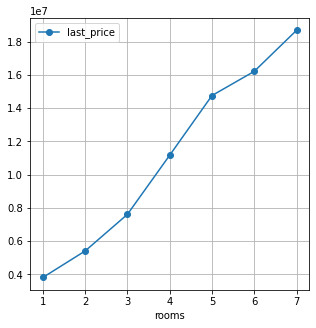

In [77]:
(
    data.query('rooms > 0').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Вывод: Число комнат влияет на цену (больше комнат - больше цена).

##### Зависимость цены от этажа, на котором расположена квартира (первый, последний, другой)

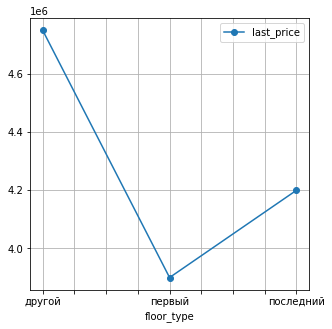

In [78]:
(
    data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Вывод: Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.

##### Зависимость цены от даты размещения (день недели, месяц, год)

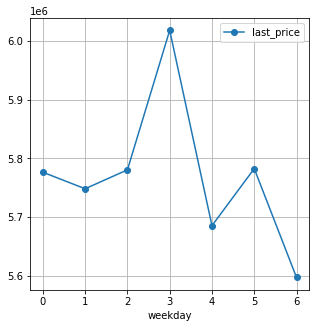

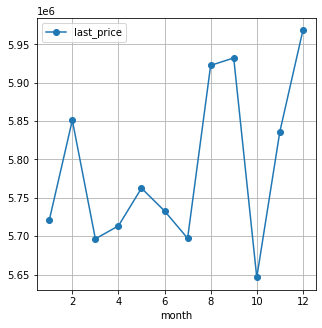

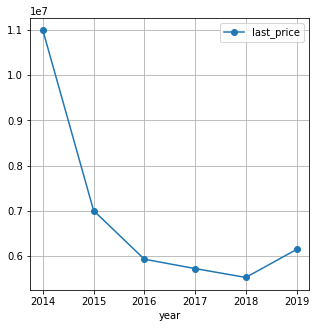

In [79]:
# Изучим зависимость цены квартиры от даты размещения (день недели)
(
    data.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

# Изучим зависимость цены квартиры от даты размещения (месяц)
(
    data.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

# Изучим зависимость цены квартиры от даты размещения (год)
(
    data.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

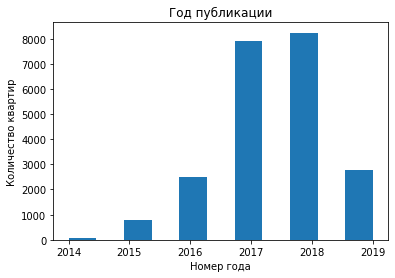

In [80]:
# Изучим как с годами менялось количество продаваемых квартир
plt.hist(data['year'], bins=11)
plt.title('Год публикации')
plt.xlabel('Номер года')
plt.ylabel('Количество квартир')
plt.show()

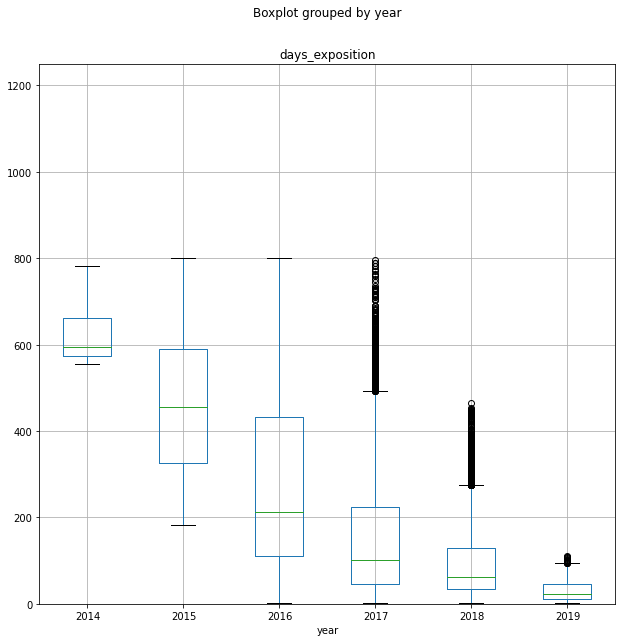

In [81]:
# Изучим как быстро с годами продавались объекты
data.boxplot('days_exposition', by='year', figsize=(10,10)).set_ylim(0,1250);

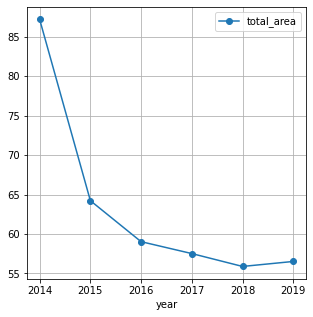

In [82]:
# Изучим как измененялась средняя площадь в течение лет
(
    data.pivot_table(index='year', values='total_area')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Вывод: 
День недели: дороже всего квартиры, опубликованные в субботу, дешевле всего - в воскресенье.
Месяц: дороже всего квартиры, продающиеся в апреле, сентябре, дешевле всего - в октябре.
Год: наблюдается спад стоимости объектов в 2014-2018 годах, что, вероятно, вызвано некоторым кризисом 2014-2015 годов. В 2017-2018 наблюдается пик количества продаваемых объектов. Так же можно увидеть, что с 2017 года среднее время продажи квартиры стало составлять менее полугода, и с каждым последующим годом это значение уменьшалось, что говорит о стабилизации рыночной ситуации. В 2019 году цены снова стали повышаться. 
Средняя площадь: в целом, с течением времени наблюдается падение спроса на объекты с высокой площадью, в 2016-2019 годах проявляется больший интерес к объектам, средняя площадь которых составляет 55-60 квадратных метров.

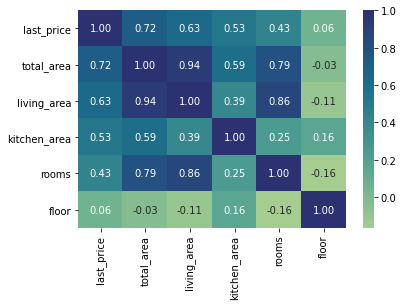

In [83]:
# Коэффициент корреляции
columns = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor']
data[columns].corr()
seaborn.heatmap(data[columns].corr(), cmap="crest", annot=True, fmt=".2f");

#### Расчет средней цены одного кв.м. в 10 населённых пунктах с наибольшим числом объявлений

In [84]:
city_ten = data['locality_name'].value_counts().head(10)
city_sm_price = data.query('locality_name in (@city_ten.index)').pivot_table(values='sm_price', index='locality_name')
city_sm_price = city_sm_price.astype(int)
city_sm_price.sort_values('sm_price', ascending=False).style.background_gradient(cmap='RdYlGn')

,sm_price
locality_name,
Санкт-Петербург,111959
Пушкин,102552
деревня Кудрово,92517
поселок Парголово,90359
поселок Мурино,85456
поселок Шушары,78477
Колпино,75199
Гатчина,68849
Всеволожск,68738


Вывод: Наибольшая средняя стоимость квадратного метра в Санкт-Петербурге. Затем идёт Пушкин, что, вероятно, вызвано большим количеством парков. Затем идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкают. Из топ-10 наименьшая стоимость в Гатчине и Всеволожске, из которых далеко ехать до Санкт-Петербурга, а также небольшой по численности населения Выборг, расположенный на большом расстоянии от Санкт-Петербурга.

#### Вычисление средней цены каждого километра

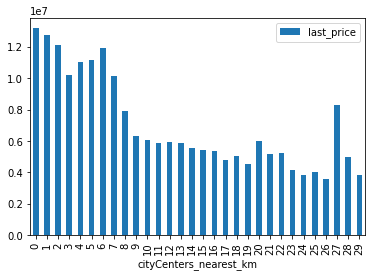

In [85]:
(
    data[data['locality_name']=='Санкт-Петербург']
    .pivot_table(
        index='cityCenters_nearest_km',
        values='last_price',
        aggfunc='mean')
    .plot(kind='bar')
);

In [86]:
# Рассмотрим записи на 27-м километре
data.query('cityCenters_nearest_km==27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sm_price,weekday,month,year,floor_type,cityCenters_nearest_km
86,15,4500000,63.0,2018-07-17,2,2.65,11,36.0,3,False,...,NaN,0,NaN,100.0,71428.571429,1,7,2018,другой,27
556,0,3500000,28.5,2018-06-06,1,2.50,5,16.0,4,False,...,NaN,0,NaN,86.0,122807.017544,2,6,2018,другой,27
558,13,4500000,65.5,2017-10-27,3,2.60,10,42.0,7,False,...,NaN,0,NaN,32.0,68702.290076,4,10,2017,другой,27
670,5,13700000,178.0,2017-08-08,4,2.77,16,125.0,4,False,...,NaN,1,914.0,112.0,76966.292135,1,8,2017,другой,27
748,13,14350000,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,1496.0,0,NaN,128.0,193918.918919,1,11,2017,другой,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22544,3,3000000,37.0,2015-12-04,1,2.65,12,14.0,4,False,...,NaN,1,986.0,221.0,81081.081081,4,12,2015,другой,27
22607,11,3790000,48.6,2018-03-26,2,2.50,9,27.4,3,False,...,NaN,0,NaN,170.0,77983.539095,0,3,2018,другой,27
22619,8,6000000,50.0,2018-09-25,3,2.50,9,39.0,9,False,...,NaN,0,NaN,NaN,120000.000000,1,9,2018,последний,27
23316,16,6300000,39.4,2016-05-16,1,3.10,5,16.0,2,False,...,966.0,1,450.0,232.0,159898.477157,0,5,2016,другой,27


In [87]:
# Удалим выбивающийся по стоимости объект
data.drop(labels=[748], axis=0, inplace=True)

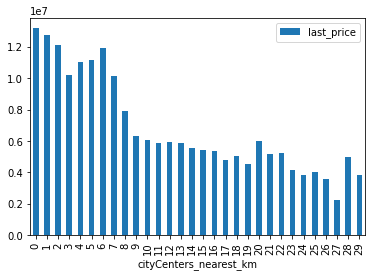

In [88]:
# Заново построим график
(
    data[data['locality_name']=='Санкт-Петербург']
    .pivot_table(
        index='cityCenters_nearest_km',
        values='last_price',
        aggfunc='mean')
    .plot(kind='bar')
);

In [89]:
# Рассмотрим количество квартир разных категорий (первый, последний, другой), которые продаются на 3-м километре
data.query('cityCenters_nearest_km == 3').groupby('floor_type')['cityCenters_nearest_km'].count().to_frame() 

,cityCenters_nearest_km
floor_type,
другой,297
первый,71
последний,94


In [90]:
# Рассмотрим количество квартир разных категорий (первый, последний, другой), которые продаются на 6-м километре
data.query('cityCenters_nearest_km == 6').groupby('floor_type')['cityCenters_nearest_km'].count().to_frame() 

,cityCenters_nearest_km
floor_type,
другой,315
первый,42
последний,66


In [91]:
data.query('cityCenters_nearest_km==6')['floor_type']

3           другой
52       последний
111         первый
143      последний
206         другой
           ...    
23378       другой
23422       другой
23583       первый
23603       другой
23690       другой
Name: floor_type, Length: 423, dtype: object

Вывод: С большим отрывом лидирует недвижимость до 1км.Видим более низкие цены на недвижимость на расстоянии от 1км до 7км включительно. Далее цена спадает на расстоянии от 8км до 29км. Провал на 3-м км можно объяснить относительно бОльшим количеством объектов, расположенных на первом и последнем этажах (цена на них ниже), а пик на 6-м км можно объяснить тем, что основная часть объектов расположена на "других", более дорогих этажах.

### Общий вывод

Срок продажи квартиры: Чаще всего квартиру продают за 94 дня. Если меньше 45 дней, то это быстро, если дольше 200 дней - это долго.Есть большое число квартир, проданных всего за несколько дней после публикации.Также есть варианты, которые продавались несколько десятков месяцев.

Факторы, влияющие на стоимость: На стоимость больше влияет площадь квартиры, нежели число комнат. 
Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.

Стоимость квадратного метра в топ-10 населённых пунктов: Дороже всего квадратный метр в Санкт-Петербурге - 111593 руб.
Дешевле всего квадратный метр в Выборге - 57722 руб.
